Duties:

- turn all currencies to euros, library to lool actual change
- check where employee residence is not where company is located, remote index...
-

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer



from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score

!pip install category_encoders
from category_encoders import TargetEncoder


import joblib



In [7]:
df = pd.read_csv("/content/sample_data/ai_job_dataset.csv")


In [8]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [10]:
for feature in df.columns:
  values = df[feature].unique().tolist()
  print(f"{feature} with values: {values} ")

job_id with values: ['AI00001', 'AI00002', 'AI00003', 'AI00004', 'AI00005', 'AI00006', 'AI00007', 'AI00008', 'AI00009', 'AI00010', 'AI00011', 'AI00012', 'AI00013', 'AI00014', 'AI00015', 'AI00016', 'AI00017', 'AI00018', 'AI00019', 'AI00020', 'AI00021', 'AI00022', 'AI00023', 'AI00024', 'AI00025', 'AI00026', 'AI00027', 'AI00028', 'AI00029', 'AI00030', 'AI00031', 'AI00032', 'AI00033', 'AI00034', 'AI00035', 'AI00036', 'AI00037', 'AI00038', 'AI00039', 'AI00040', 'AI00041', 'AI00042', 'AI00043', 'AI00044', 'AI00045', 'AI00046', 'AI00047', 'AI00048', 'AI00049', 'AI00050', 'AI00051', 'AI00052', 'AI00053', 'AI00054', 'AI00055', 'AI00056', 'AI00057', 'AI00058', 'AI00059', 'AI00060', 'AI00061', 'AI00062', 'AI00063', 'AI00064', 'AI00065', 'AI00066', 'AI00067', 'AI00068', 'AI00069', 'AI00070', 'AI00071', 'AI00072', 'AI00073', 'AI00074', 'AI00075', 'AI00076', 'AI00077', 'AI00078', 'AI00079', 'AI00080', 'AI00081', 'AI00082', 'AI00083', 'AI00084', 'AI00085', 'AI00086', 'AI00087', 'AI00088', 'AI00089', 

In [11]:
# erase commas and spaces, putting everythin in a list
all_skills = [item.strip() for line in df['required_skills'] for item in line.split(',')]

# Count frecuencues with collections.Counter()
skill_counts = Counter(all_skills)

# Sorting skills by count creating a list of tuples
sorted_skill_counts = skill_counts.most_common()

# Putting each part of the tuple (skills and counts) into a separate list.
skills = [skill for skill, count in sorted_skill_counts]
# erase commas and spaces, putting everythin in a list
all_skills = [item.strip() for line in df['required_skills'] for item in line.split(',')]

# Count frecuencues with collections.Counter()
skill_counts = Counter(all_skills)

# Sorting skills by count creating a list of tuples
sorted_skill_counts = skill_counts.most_common()

# Putting each part of the tuple (skills and counts) into a separate list.
skills = [skill for skill, count in sorted_skill_counts]
counts = [count for skill, count in sorted_skill_counts]

for skill, count in sorted_skill_counts:
  print(f"{skill}: {count}")

print(skill_counts)

Python: 4450
SQL: 3407
TensorFlow: 3022
Kubernetes: 3009
Scala: 2794
PyTorch: 2777
Linux: 2705
Git: 2631
Java: 2578
GCP: 2442
Hadoop: 2419
Tableau: 2341
R: 2311
Computer Vision: 2284
Data Visualization: 2270
Deep Learning: 2189
MLOps: 2164
Spark: 2155
NLP: 2145
Azure: 2144
AWS: 2018
Mathematics: 1943
Docker: 1862
Statistics: 1833
Counter({'Python': 4450, 'SQL': 3407, 'TensorFlow': 3022, 'Kubernetes': 3009, 'Scala': 2794, 'PyTorch': 2777, 'Linux': 2705, 'Git': 2631, 'Java': 2578, 'GCP': 2442, 'Hadoop': 2419, 'Tableau': 2341, 'R': 2311, 'Computer Vision': 2284, 'Data Visualization': 2270, 'Deep Learning': 2189, 'MLOps': 2164, 'Spark': 2155, 'NLP': 2145, 'Azure': 2144, 'AWS': 2018, 'Mathematics': 1943, 'Docker': 1862, 'Statistics': 1833})


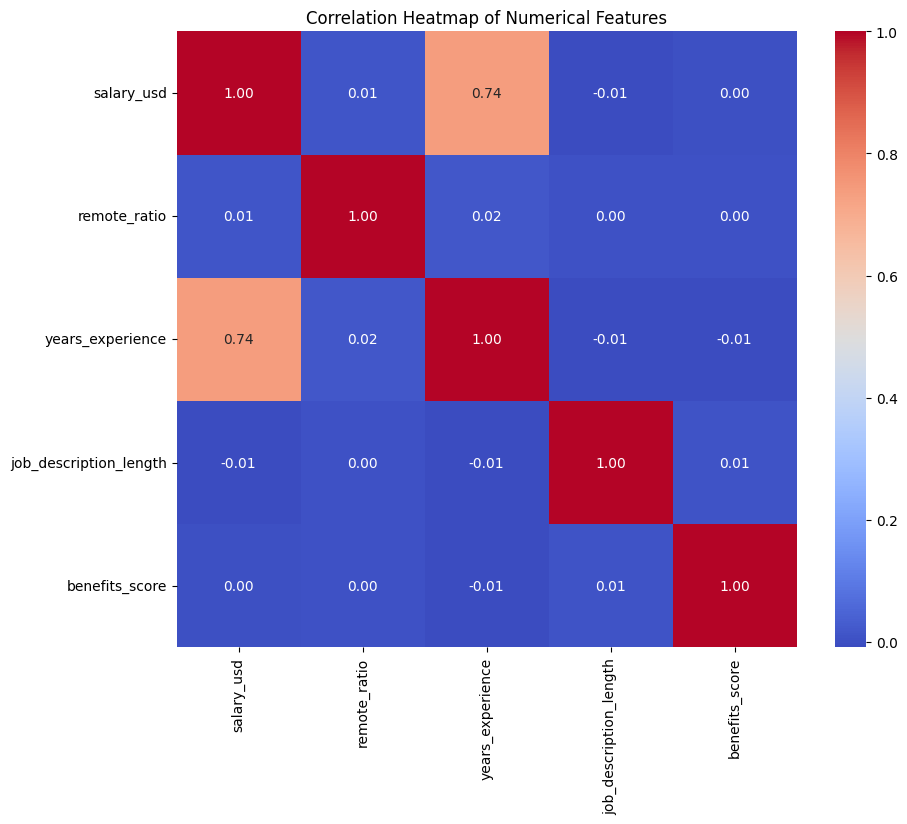

In [12]:
# There are not many numerical features tu assume plenty stuff, but let's make it anyway...we can see the only
# value affecting the greatly the salary are the years of experience of course.

# Let's create a sample correlation matrix from numerical columns of the dataframe


numerical_df = df.select_dtypes(include = np.number)
correlation_matrix = numerical_df.corr('pearson')
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt= ".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

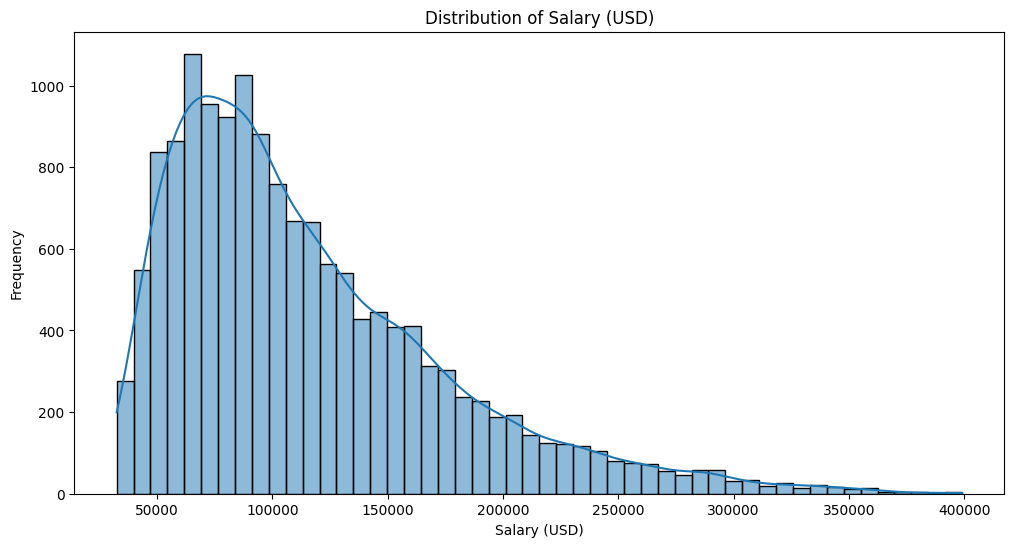

In [13]:
# prompt: hazme un barchart con una distribucion de "salary_usd"

plt.figure(figsize=(12, 6))
sns.histplot(df['salary_usd'], bins=50, kde=True)
plt.title('Distribution of Salary (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

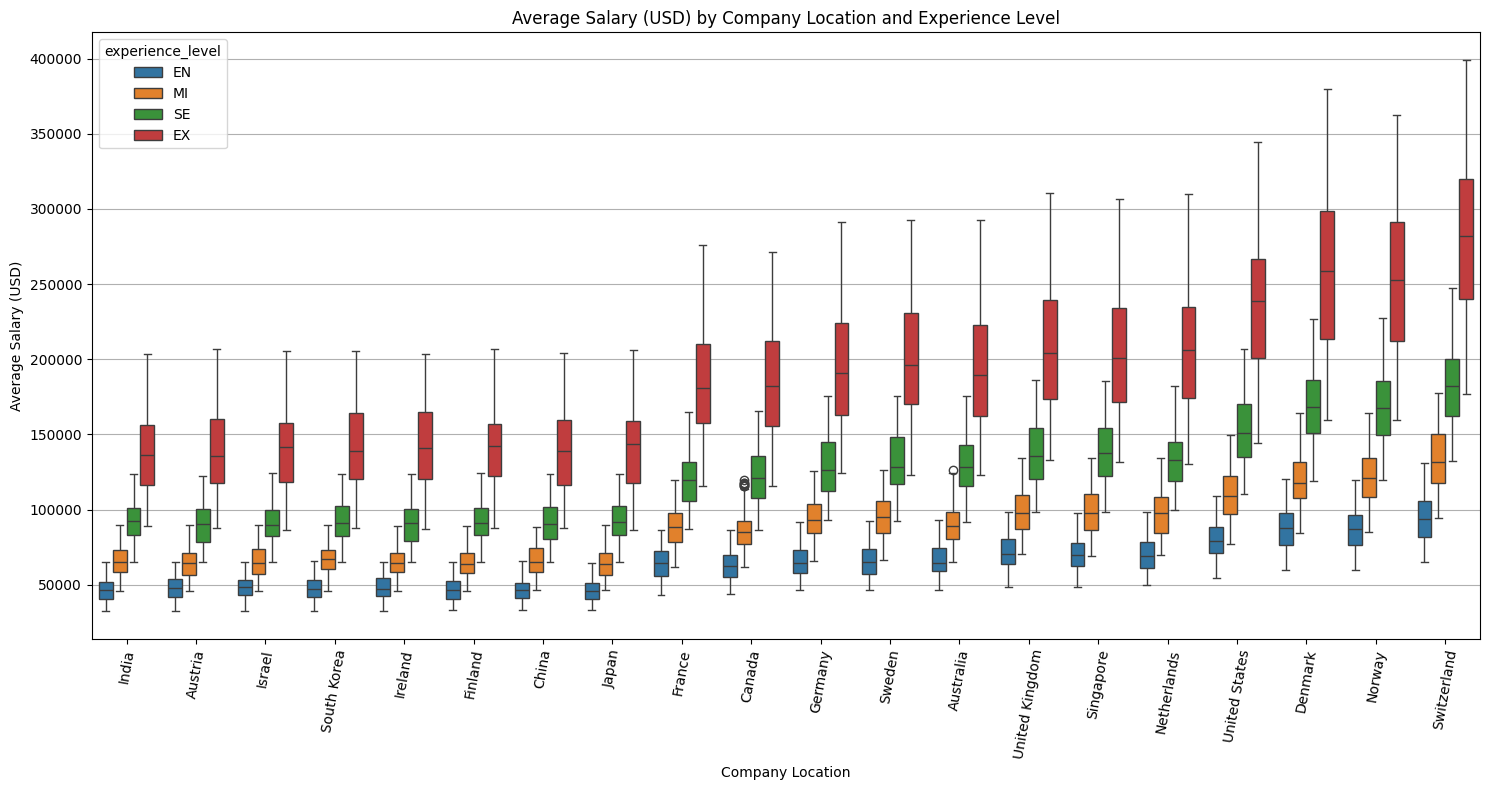

In [14]:


plt.figure(figsize=(15, 8))
sns.boxplot(data=df.sort_values("salary_usd"), x='company_location', y='salary_usd', hue='experience_level')
plt.title('Average Salary (USD) by Company Location and Experience Level')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=80)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

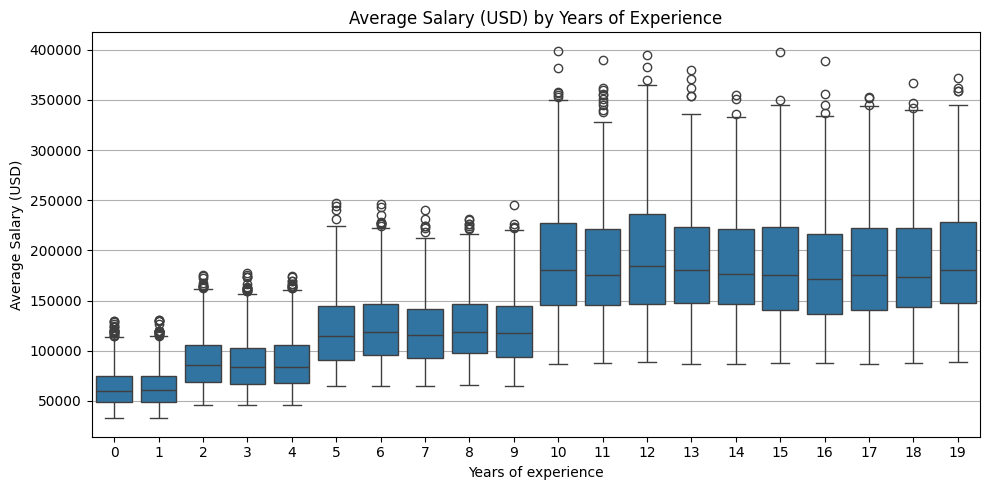

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.sort_values("years_experience"), x='years_experience', y='salary_usd')
plt.title('Average Salary (USD) by Years of Experience')
plt.xlabel('Years of experience')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

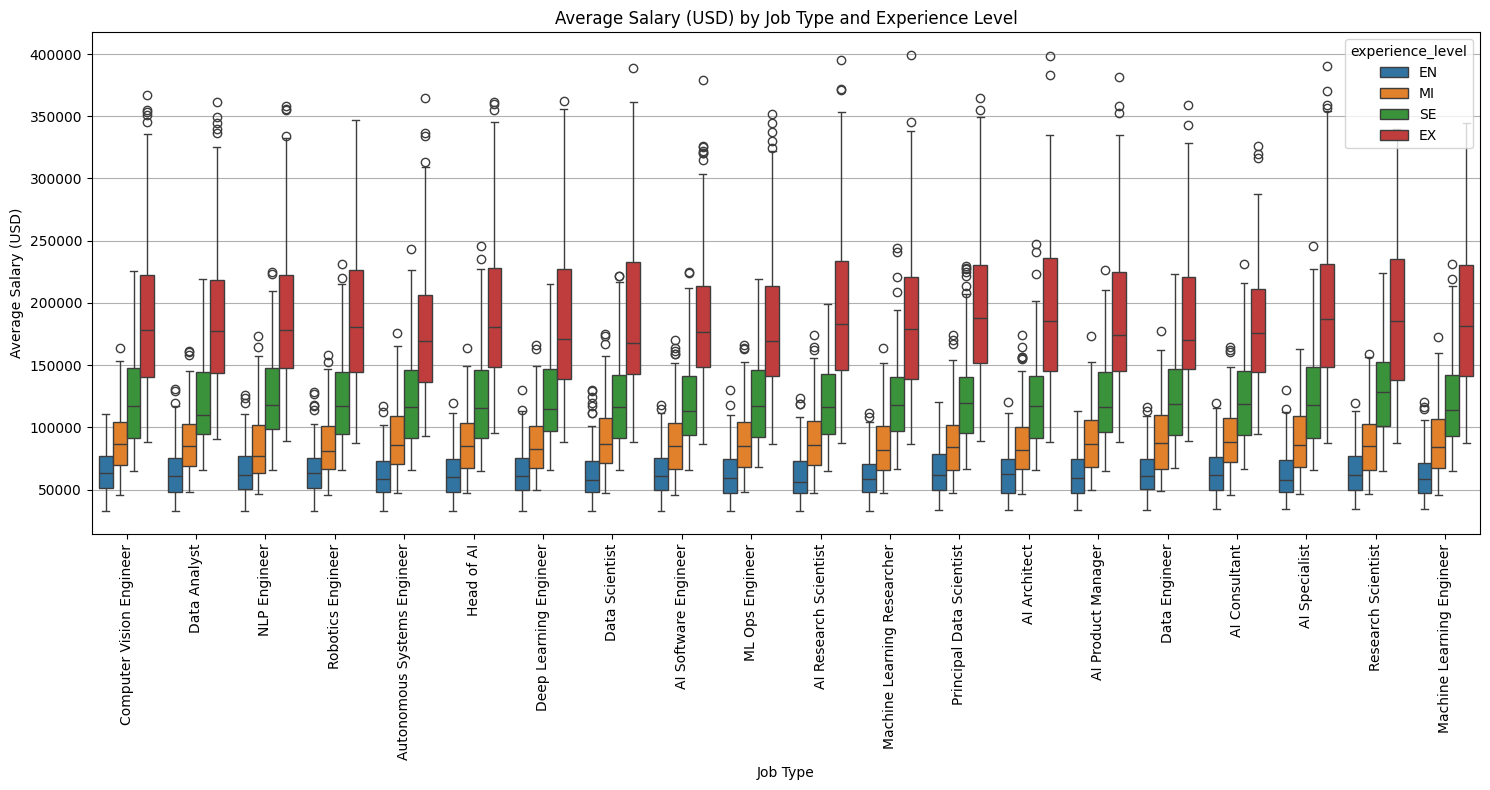

In [16]:
# Salary by job_title

plt.figure(figsize=(15, 8))
sns.boxplot(data=df.sort_values("salary_usd"), x='job_title', y='salary_usd', hue='experience_level')
plt.title('Average Salary (USD) by Job Type and Experience Level')
plt.xlabel('Job Type')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

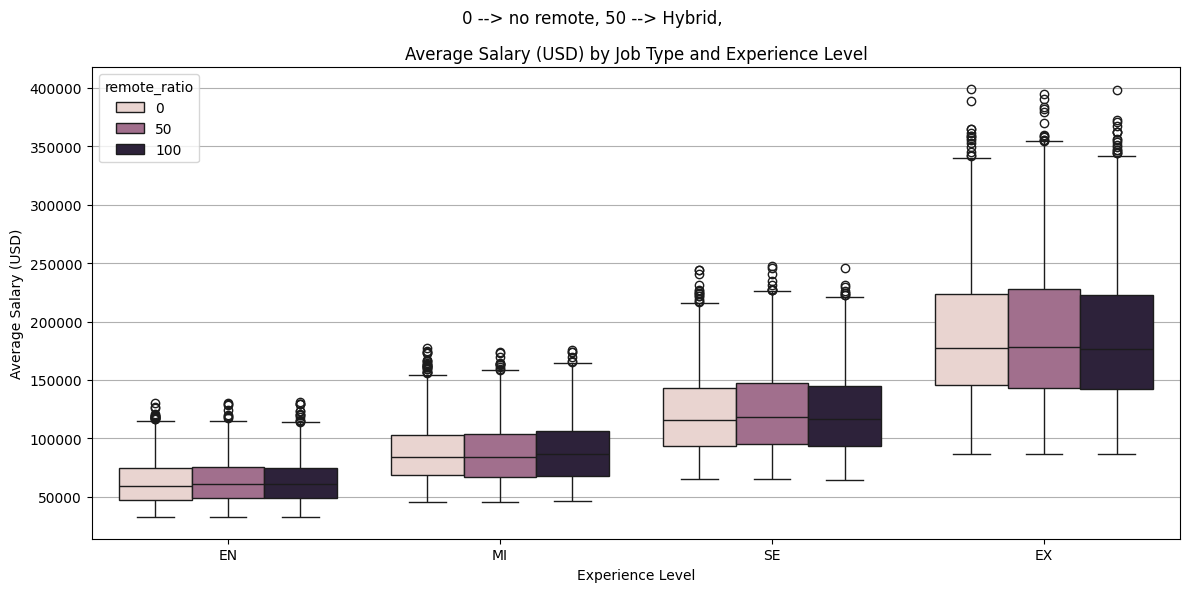

In [17]:
# Salary by Remote / Hybrid / No remote

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.sort_values("salary_usd"), x='experience_level', y='salary_usd', hue='remote_ratio')
plt.title('Average Salary (USD) by Job Type and Experience Level')
plt.suptitle('0 --> no remote, 50 --> Hybrid, ')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

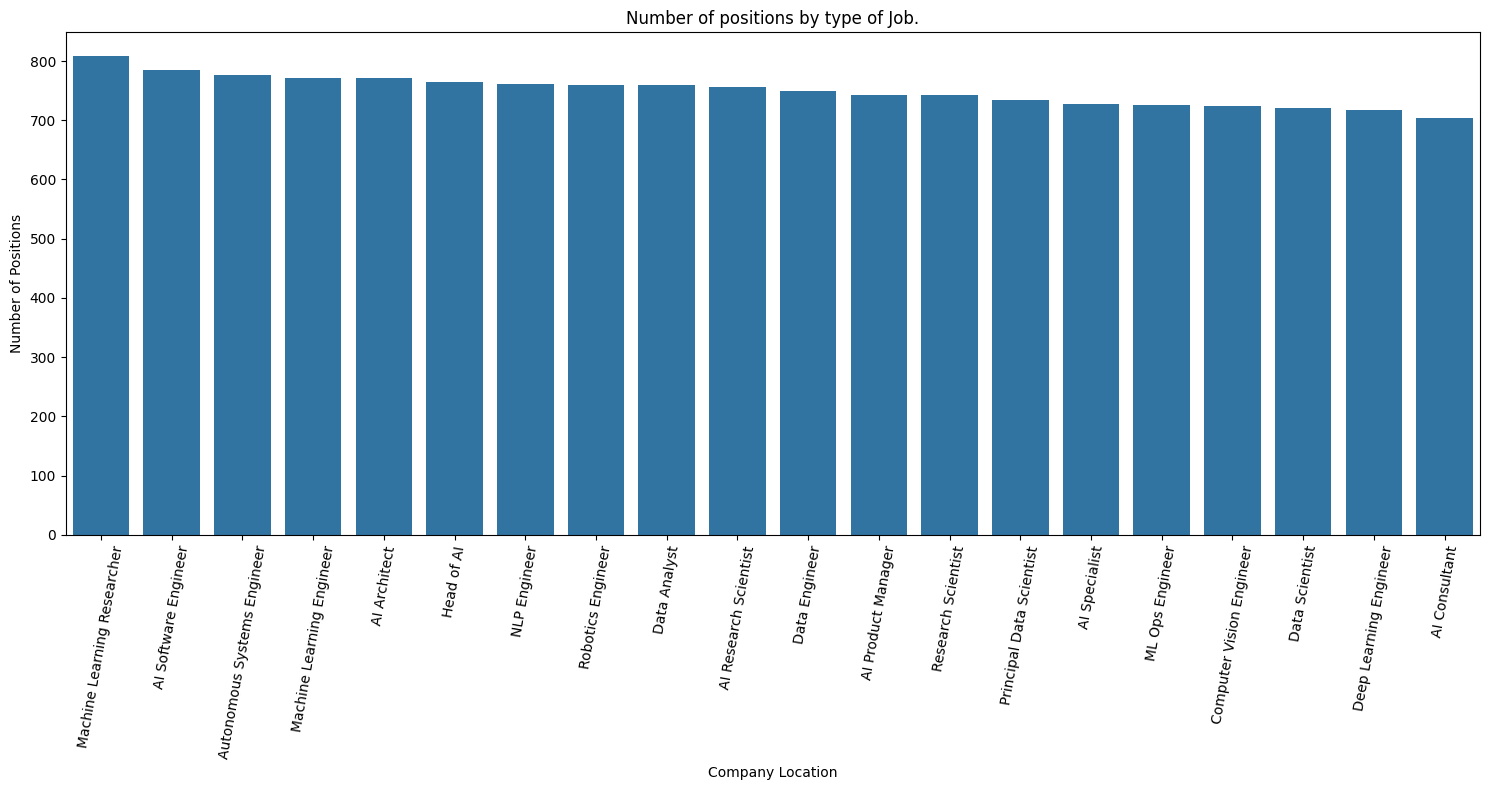

In [18]:
# Most required Skills:

skills_number = df['job_title'].value_counts()


plt.figure(figsize=(15, 8))
sns.barplot(x=skills_number.index, y= skills_number.values)
plt.title('Number of positions by type of Job.')
plt.xlabel('Company Location')
plt.ylabel('Number of Positions')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

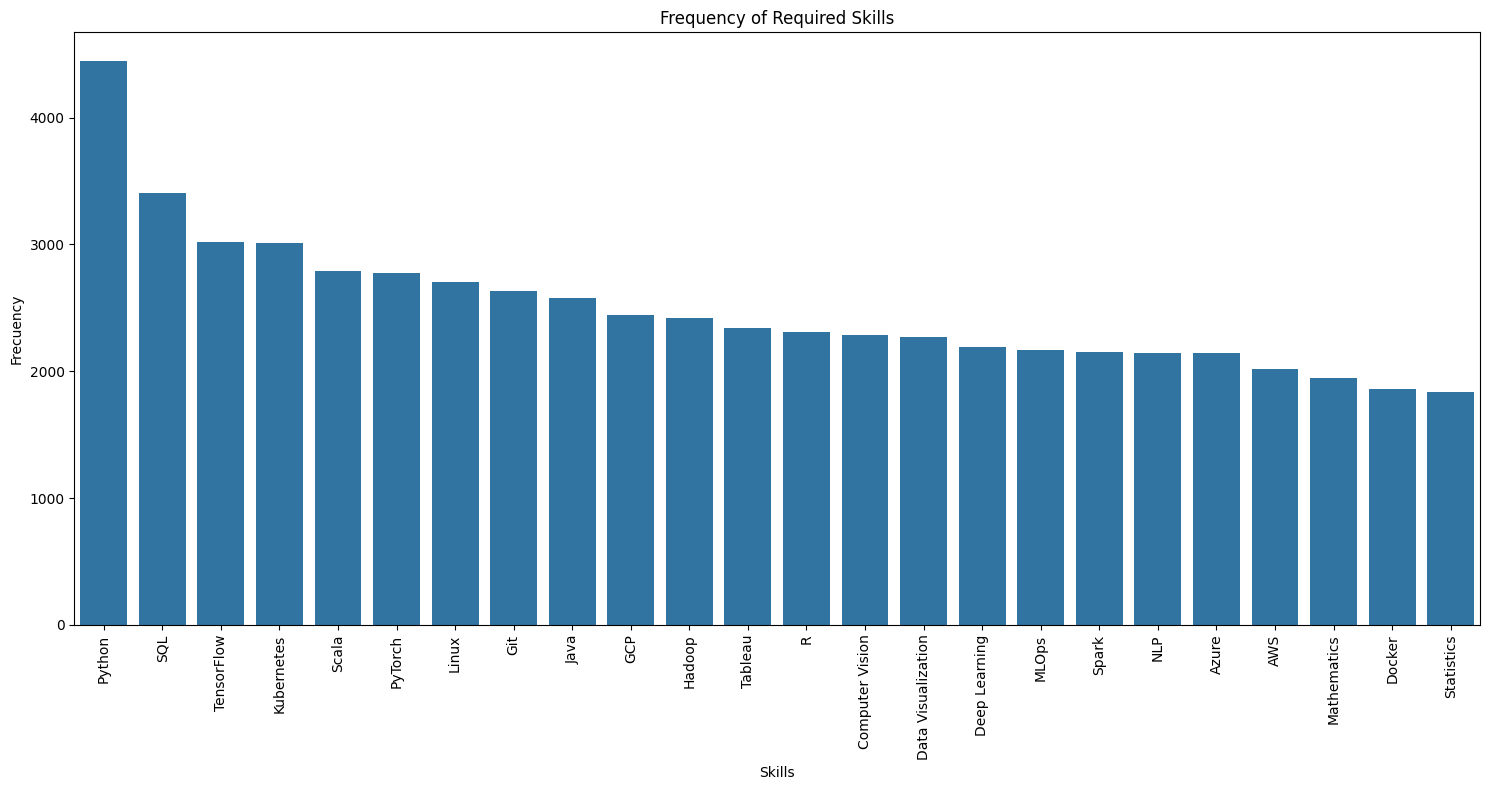

In [19]:
# erase commas and spaces, putting everythin in a list
all_skills = [item.strip() for line in df['required_skills'] for item in line.split(',')]

# Count frecuencues with collections.Counter()
skill_counts = Counter(all_skills)

# Sorting skills by count creating a list of tuples
sorted_skill_counts = skill_counts.most_common()

# Putting each part of the tuple (skills and counts) into a separate list.
skills = [skill for skill, count in sorted_skill_counts]
counts = [count for skill, count in sorted_skill_counts]

plt.figure(figsize=(15,8))
sns.barplot(x=skills, y= counts, order= skills)
plt.title('Frequency of Required Skills')
plt.xlabel('Skills')
plt.ylabel('Frecuency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




# DATA PREPROCESSING


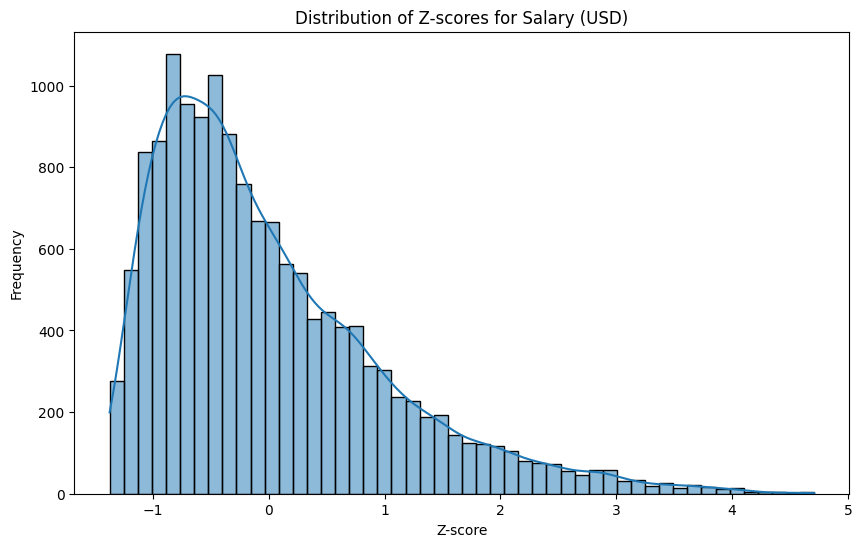

In [20]:
# OUTLIERS - I consider the outlyers to be representative to this dataset so I don't do anything to them



from scipy.stats import zscore

# Calculate the Z-scores for the 'salary_usd_converted' column
df['salary_usd_converted_zscore'] = zscore(df['salary_usd'])

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Identify outliers based on the Z-score
outliers = df[abs(df['salary_usd_converted_zscore']) > outlier_threshold]

# You can visualize the Z-scores to get a better sense of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_usd_converted_zscore'], bins=50, kde=True)
plt.title('Distribution of Z-scores for Salary (USD)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_id                       15000 non-null  object 
 1   job_title                    15000 non-null  object 
 2   salary_usd                   15000 non-null  int64  
 3   salary_currency              15000 non-null  object 
 4   experience_level             15000 non-null  object 
 5   employment_type              15000 non-null  object 
 6   company_location             15000 non-null  object 
 7   company_size                 15000 non-null  object 
 8   employee_residence           15000 non-null  object 
 9   remote_ratio                 15000 non-null  int64  
 10  required_skills              15000 non-null  object 
 11  education_required           15000 non-null  object 
 12  years_experience             15000 non-null  int64  
 13  industry        

In [22]:
df.drop(['job_id','salary_currency','posting_date','application_deadline','required_skills','job_description_length','company_name','benefits_score'],axis=1, inplace=True)

In [23]:
df.head(2)
#print(df['company_size'].unique())

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,industry,salary_usd_converted_zscore
0,AI Research Scientist,90376,SE,CT,China,M,China,50,Bachelor,9,Automotive,-0.414428
1,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,Master,1,Media,-0.887071


In [24]:
# SEPARATING TRAINING, VALIDATION, TEST datasets

y = df['salary_usd']             # Variable objetivoy = df['target_column']             # Variable objetivo
X = df.drop('salary_usd', axis=1) # Características

# First
X_train, X_test_val, y_train, y_test_val = train_test_split(X,y, test_size = 0.3, random_state=42)

# Second
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state=42)

In [25]:
# HANDLING CATEGORICAL VALUES

ordinal_encode_cols = ['experience_level','company_size']
ordinal_categories = [
    ['EN','MI','SE','EX'],
    ['S','M','L']
]

one_hot_encoder_cols = ['employment_type','remote_ratio',
                        'education_required','industry','job_title']
target_encoder_cols = ['company_location','employee_residence']
numeric_scaler_cols = ['years_experience']



# ---- Ordinal Encoder----
ordinal_encoder = Pipeline([
    ('inputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories = ordinal_categories))
])


#-----Target Encoder -------
target_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target_enc', TargetEncoder())
])

# -----oneHot encoder
onehot_encoder = Pipeline([
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore',sparse_output=False))
])

#------numerical scaler
num_scaler = Pipeline([
    ('imputer',SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

# ========= Column Transformer

preprocessor = ColumnTransformer([
    ('ordinal', ordinal_encoder, ordinal_encode_cols),
    ('target', target_encoder, target_encoder_cols),
    ('onehot', onehot_encoder, one_hot_encoder_cols),
    ('num', num_scaler, numeric_scaler_cols),

])


# ==== General Pipeline

full_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])





In [26]:
# =========== Models to try
models = [
    ('LinearRegression',LinearRegression()),
    ('Ridge', Ridge(alpha = 1.0)),
    ('Lasso', Lasso(alpha = 0.1)),
    ('RandomForestRegression',RandomForestRegressor(n_estimators = 100, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators = 100, random_state = 42)),
    ('HistGB', HistGradientBoostingRegressor(max_iter = 100, random_state = 42)),
    ('XGBoost', XGBRegressor(n_estimators = 100, random_state = 42))
]

# ==== ejecutar todos ====
results = []

for name,model in models:

  full_pipeline.set_params(model = model)

  #train
  full_pipeline.fit(X_train,y_train)
  #Predict
  y_pred = full_pipeline.predict(X_val)
  # Evaluate with R2
  score = r2_score(y_val, y_pred)

  results.append((name,score))


# Mostrar resultados ordenados por R²
for name, score in sorted(results, key=lambda x: -x[1]):
    print(f"{name}: R² en validación = {score:.4f}")

GradientBoosting: R² en validación = 0.8947
HistGB: R² en validación = 0.8920
RandomForestRegression: R² en validación = 0.8798
XGBoost: R² en validación = 0.8729
Ridge: R² en validación = 0.8402
Lasso: R² en validación = 0.8402
LinearRegression: R² en validación = 0.8402


In [27]:
'''
GradientBoosting: R² en validación = 0.8971
HistGB: R² en validación = 0.8925
XGBoost: R² en validación = 0.8923
RandomForestRegression: R² en validación = 0.8797
Ridge: R² en validación = 0.8327
Lasso: R² en validación = 0.8120
LinearRegression: R² en validación = 0.8084
'''

'\nGradientBoosting: R² en validación = 0.8971\nHistGB: R² en validación = 0.8925\nXGBoost: R² en validación = 0.8923\nRandomForestRegression: R² en validación = 0.8797\nRidge: R² en validación = 0.8327\nLasso: R² en validación = 0.8120\nLinearRegression: R² en validación = 0.8084\n'

In [28]:
# we test again the best model with the validatiion test, to don't spend computational tie on the other models

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
full_pipeline.set_params(model=model)

# Entrena en train
full_pipeline.fit(X_train, y_train)

# Evalúa en validación
y_val_pred = full_pipeline.predict(X_val)
val_score = r2_score(y_val, y_val_pred)
print(f"R² en validación: {val_score:.4f}")


R² en validación: 0.8947


In [29]:
# then we test again with the test set
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
full_pipeline.set_params(model=model)

# Entrena en train
full_pipeline.fit(X_train, y_train)

# Evalúa en validación
y_test_pred = full_pipeline.predict(X_test)
val_score = r2_score(y_test, y_test_pred)
print(f"R² en test: {val_score:.4f}")


R² en test: 0.8905


In [30]:
# save the model to joblib

#joblib.dump(model,'model_ai_jobs.joblib')
joblib.dump(full_pipeline, 'model_ai_jobs.joblib')

['model_ai_jobs.joblib']